In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("titanic_data.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Numerical values Analysis

<Axes: >

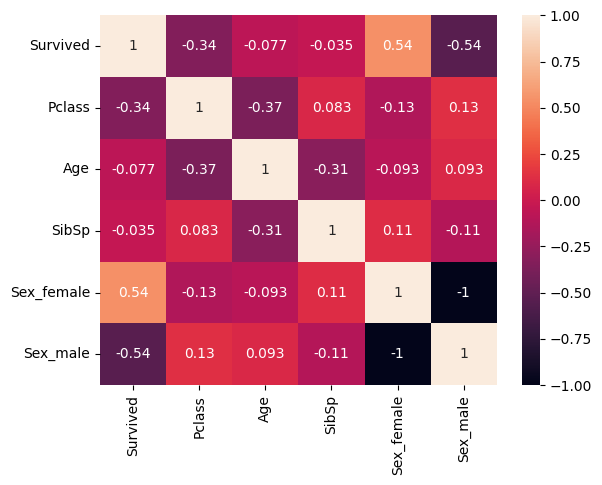

In [6]:
new_data = pd.get_dummies(data[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp']])
sns.heatmap(new_data.corr(), annot=True)

## Number of siblings / spouses

Text(0, 0.5, 'Survival probability')

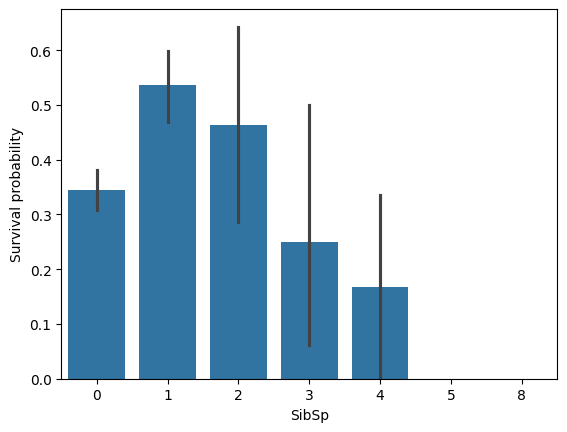

In [7]:
sns.barplot(data=data, x='SibSp', y='Survived')
plt.ylabel('Survival probability')

It seems that passengers having a lot of siblings/spouses have less chance to survive.

## Age

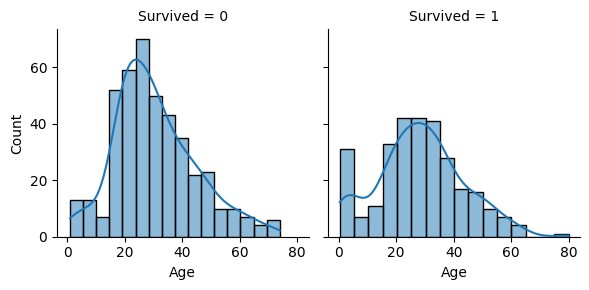

In [8]:
age_visual = sns.FacetGrid(data, col = 'Survived')
age_visual.map(sns.histplot, "Age", kde=True)

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

## Sex

Text(0, 0.5, 'Survival probability')

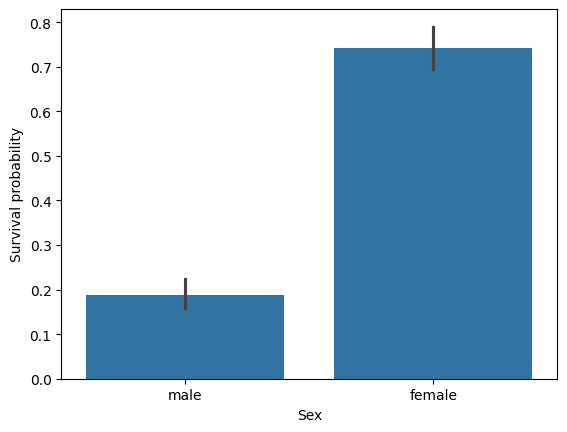

In [9]:
sns.barplot(data=data, x='Sex', y='Survived')
plt.ylabel('Survival probability')

In [10]:
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival.

## Class

Text(0, 0.5, 'Survival probability')

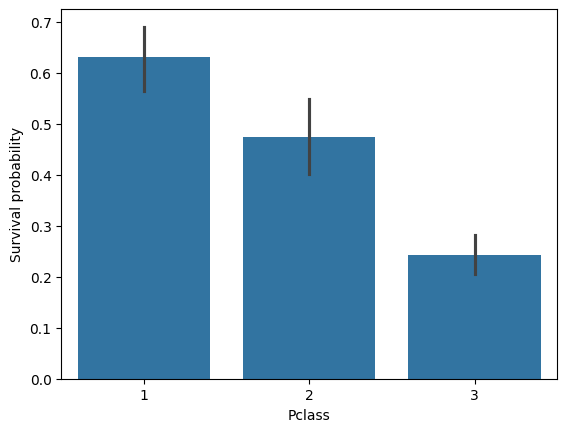

In [11]:
sns.barplot(data=data, x='Pclass', y='Survived')
plt.ylabel('Survival probability')

People from higher class had more chances to survive

### Class & Sex

Text(0, 0.5, 'Survival probability')

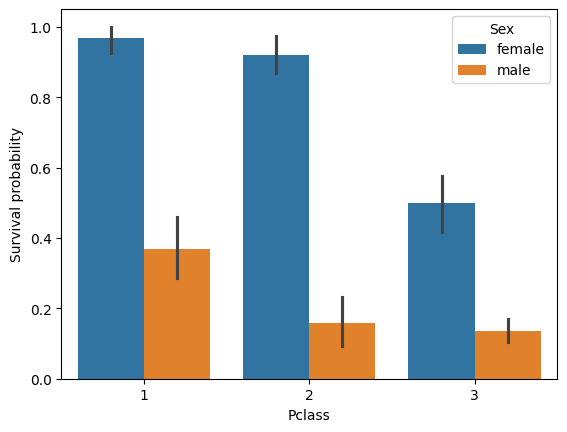

In [12]:
sns.barplot(data=data, x='Pclass', y='Survived', hue='Sex')
plt.ylabel('Survival probability')

## Embarked

In [13]:
data["Embarked"].isnull().sum()

2

In [14]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
data["Embarked"] = data["Embarked"].fillna("S")
data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Text(0, 0.5, 'Survival probability')

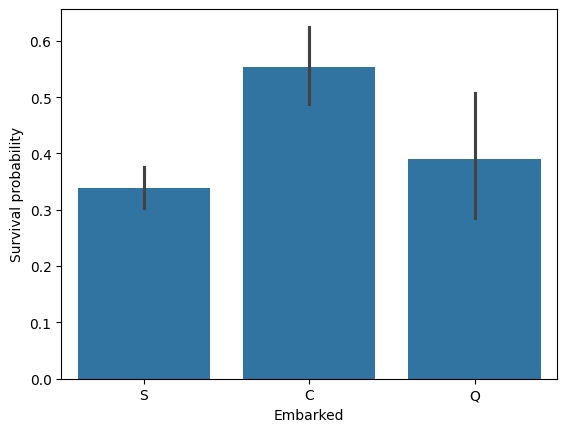

In [16]:
sns.barplot(data=data, x='Embarked', y='Survived')
plt.ylabel('Survival probability')

Passenger coming from Cherbourg (C) have more chance to survive.

### Finding the reason

C:\Users\murta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


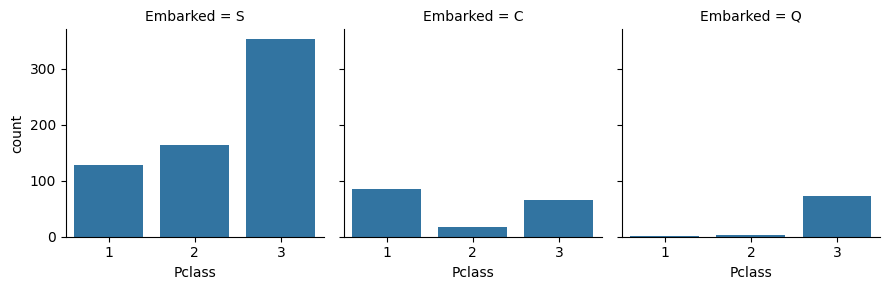

In [17]:
age_visual = sns.FacetGrid(data, col = 'Embarked')
age_visual.map(sns.countplot, "Pclass")

Cherbourg passengers are mostly in first class which is why they have highest survival rate.
Southampton (S) and Queenstown (Q) passangers are mostly in third class.

# Making Classification

## Preparing Data

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data['Age'].isnull().sum()

177

In [20]:
mean = data['Age'].mean()
std = data['Age'].std()

new_age = data['Age'].copy()
mask = new_age.isnull()
new_age[mask] = np.random.randint(mean - std, mean + std, new_age[mask].size)
data['Age'] = new_age

In [21]:
data['Age'].isnull().sum()

0

In [22]:
col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
data.drop(col_to_drop, axis=1, inplace=True)

In [23]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)
ports = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

## Splitting data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [26]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Working with Models

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
dict = {
    'Logistic Regression': LogisticRegression(),
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [30]:
print('Scores')
scores = {}
for name, model in dict.items():
    model = make_pipeline(StandardScaler(), model)
    model.fit(X_train, y_train)
    score = round(model.score(X_test, y_test) * 100, 2)
    scores[name] = score
    print(f'{name}: {score}')

Scores
Logistic Regression: 80.97
Extra Trees: 78.73
Random Forest: 80.22
KNN: 80.97
Support Vector Machine: 81.72


In [31]:
df = pd.DataFrame(scores.values(), index=scores.keys(), columns=['Score'])
df

,Score
Logistic Regression,80.97
Extra Trees,78.73
Random Forest,80.22
KNN,80.97
Support Vector Machine,81.72


<Axes: >

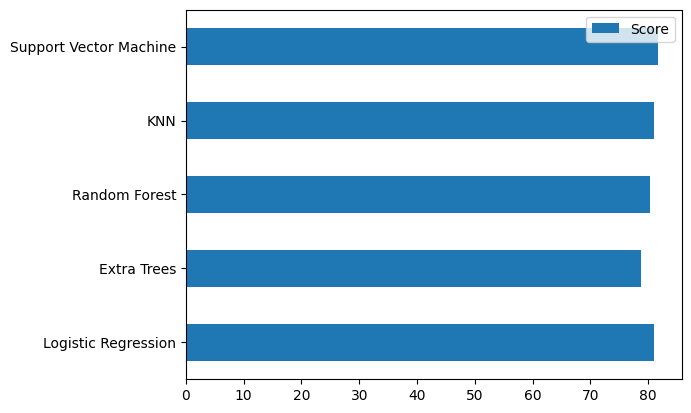

In [32]:
df.plot(kind='barh')

## Exporting Model

In [33]:
import joblib

In [34]:
model = LogisticRegression()
model = make_pipeline(StandardScaler(), model)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
user_data = {'Pclass': 1,
                 'Sex': 1,
                 'Age': 80,
                 'SibSp': 0,
                 'Parch': 0,
                 'Fare': 100,
                 'Embarked': 1}

df = pd.DataFrame(user_data, index=[0])
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,80,0,0,100,1


In [39]:
res = model.predict(df)
res

array([1], dtype=int64)

In [37]:
joblib.dump(model, 'model.joblib')

['model.joblib']